In [3]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
pd.set_option('display.max_columns', 100)

In [6]:
print('Pandas version ' + pd.__version__)

Pandas version 0.24.2


In [7]:
print('Numpy version ' + np.__version__)

Numpy version 1.16.4


In [15]:
data = pd.read_csv("data/irclog.tsv", sep="\t", encoding="unicode_escape")

In [16]:
data.head()

,id,channel,day,nick,timestamp,line,spam,in_summary
0,1,#dvn,2012-12-08,NaN,1355005146,iqlogbot joined #dvn,0,0
1,2,#dvn,2012-12-08,NaN,1355005248,Topic for #dvn is now http://thedata.org - The...,0,0
2,3,#dvn,2012-12-08,pdurbin,1355005351,"hello! welcome to #dvn, an IRC channel on Free...",0,0
3,4,#dvn,2012-12-08,pdurbin,1355005459,our website is http://thedata.org and we're st...,0,0
4,5,#dvn,2012-12-08,pdurbin,1355005517,we call our project DVN for short :),0,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93663 entries, 0 to 93662
Data columns (total 8 columns):
id            93663 non-null int64
channel       93663 non-null object
day           93663 non-null object
nick          60849 non-null object
timestamp     93663 non-null int64
line          93661 non-null object
spam          93663 non-null int64
in_summary    93663 non-null int64
dtypes: int64(4), object(4)
memory usage: 5.7+ MB


In [18]:
list(data.columns)

['id', 'channel', 'day', 'nick', 'timestamp', 'line', 'spam', 'in_summary']

In [19]:
data['channel'].value_counts()

#dataverse    83403
#dvn          10260
Name: channel, dtype: int64

In [20]:
data['day'] = data['day'].apply(lambda x: pd.to_datetime(x))

In [23]:
data['month'] = data['day'].dt.month
data['year'] = data['day'].dt.year

In [32]:
data['date'] = data.year.astype(str) + '_' + data.month.astype(str)

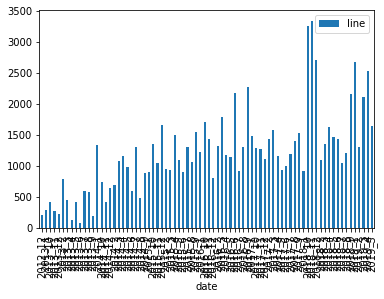

In [34]:
data.groupby(['date'], as_index=False)['line'].count().plot(x='date', y='line', kind='bar')